In [ ]:
# 1. Import libraries
import ast 
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 2. Load a dataset
ds = load_dataset("lukebarousse/data_jobs")  

df_copy = ds['train'].to_pandas()  

df = df_copy.copy()  


# 3. Data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)  

df['job_skills'] = df['job_skills'].apply(
    lambda skills: ast.literal_eval(skills) if pd.notna(skills) else []
)

c:\Users\User\anaconda3\envs\analysis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


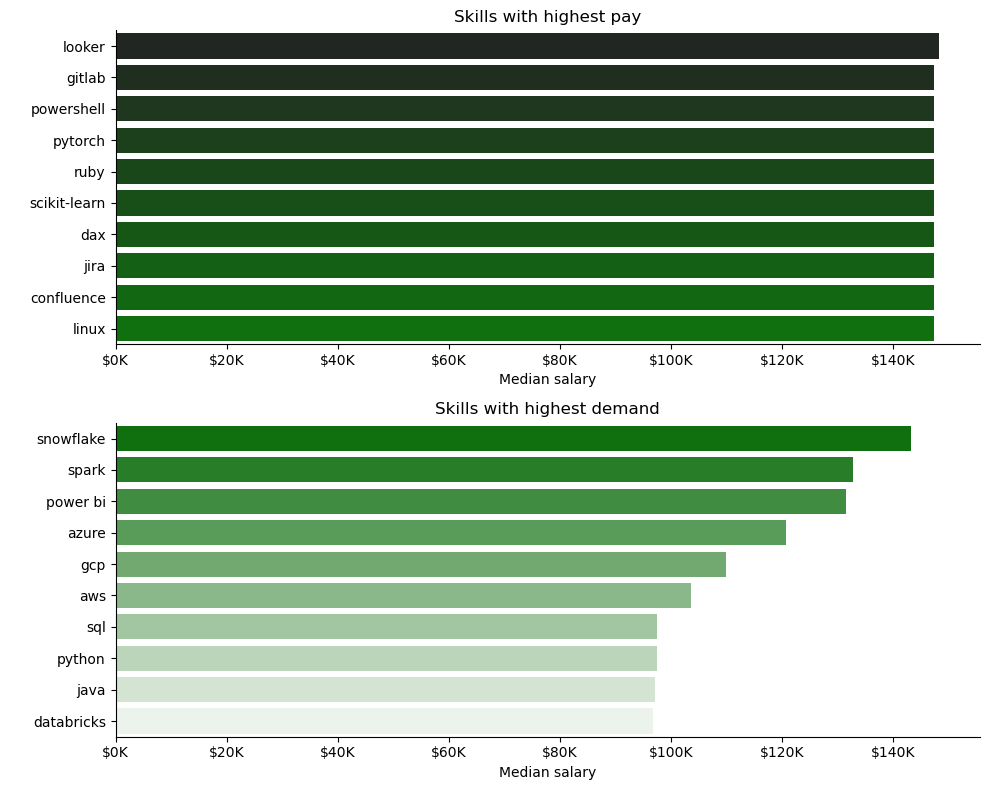

In [9]:
# 1. Filter dataset for a specific country and job title
df_uk = df[
    (df['job_country'] == df['job_country'].value_counts().index[2]) & 
    (df['job_title_short'] == df['job_title_short'].value_counts().index[1])
].copy()
# Select the third most common country and the second most common job title

# 2. Explode the job_skills list into separate rows
df_exp = df_uk.explode('job_skills')

# 3. Group by skill to calculate median salary and demand count
df_group = df_exp.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    demand_count=('job_skills', 'count')
)

# 4. Identify top 10 skills by pay and top 10 skills by demand
top_pay = df_group.sort_values(by='median_salary', ascending=False).head(10)
  
top_demand = df_group.sort_values(by='demand_count', ascending=False).head(10).sort_values(by='median_salary', ascending=False)

# 5. Plot the skills data as horizontal bar charts
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sns.barplot(
    data=top_pay, 
    x='median_salary', 
    y='job_skills', 
    hue='job_skills', 
    ax=ax[0], 
    palette='dark:g'
)
sns.barplot(
    data=top_demand, 
    x='median_salary', 
    y='job_skills', 
    hue='job_skills', 
    palette='light:g_r', 
    ax=ax[1]
)

sns.despine()  # Remove top and right spines for cleaner plots

# 6. Customize axes and labels
ax[0].set_ylabel(' ')
ax[1].set_ylabel(' ')
ax[0].set_xlabel('Median salary')
ax[1].set_xlabel('Median salary')
ax[1].set_xlim(ax[0].get_xlim())  # Match x-axis limits
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, y: f"${int(x/1000)}K"))
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, y: f"${int(x/1000)}K"))

# 7. Add titles
ax[0].set_title('Skills with highest pay')
ax[1].set_title('Skills with highest demand')

# 8. Adjust layout and show the figure
fig.tight_layout()
plt.show()